# Calculate the rotation distribution for hot stars

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from plotstuff import colours
cols = colours()
%matplotlib inline

In [33]:
plotpar = {'axes.labelsize': 20,
           'text.fontsize': 20,
           'legend.fontsize': 15,
           'xtick.labelsize': 20,
           'ytick.labelsize': 20,
           'text.usetex': True}
plt.rcParams.update(plotpar)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
KID, Teff, logg, Mass, Prot, Prot_err, Rper, LPH, w, DC, Flag = \
    np.genfromtxt("Table_1_Periodic.txt", delimiter=",", skip_header=1).T
m = Teff > 6250
Prot, Rper, Teff = Prot[m], Rper[m], Teff[m]

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


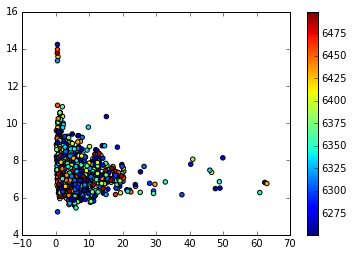

In [3]:
plt.scatter(Prot, np.log(Rper), c=Teff)
plt.colorbar()

[ 2.10053]


/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 51 but corresponding boolean dimension is 50
/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 51 but corresponding boolean dimension is 50
/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 51 but corresponding boolean dimension is 50


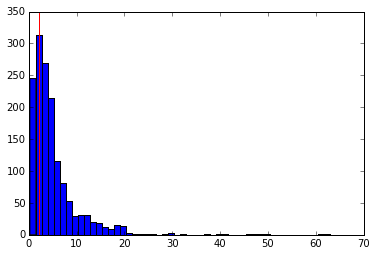

In [4]:
plt.hist(Prot, 50)
N, P_bins = np.histogram(Prot, 50)
m = N == max(N)
ind = int(np.arange(len(P_bins))[m][0] + 1)
plt.axvline((P_bins[m] + P_bins[ind])/2, color="r")
print((P_bins[m] + P_bins[ind])/2)

Fit a Gaussian

In [5]:
def Gaussian(par, x):
    A, mu, sig = par
    return A * np.exp(-.5*(x-mu)**2/sig**2)

In [6]:
def chi2(par, x, y):
    return sum((y - Gaussian(par, x))**2) 

In [7]:
import scipy.optimize as sco
par_init = 300, 2.10053, 5.
x, y = P_bins[1:], N
result1 = sco.minimize(chi2, par_init, args=(x, y))
A, mu, sig = result1.x
print(A, mu, sig)

289.978994606 2.86094305478 3.03019270657


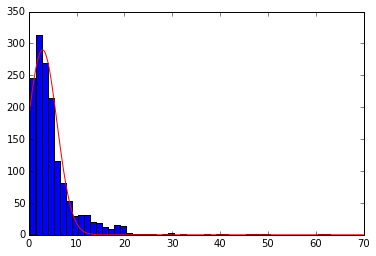

In [8]:
plt.hist(Prot, 50)
xs = np.linspace(0, 70, 1000)
ys = Gaussian(result1.x, xs)
plt.plot(xs, ys, "r")

Fit two Gaussians

In [9]:
def Double_Gaussian(par, x):
    A1, A2, mu1, mu2, sig1, sig2 = par
    return A1 * np.exp(-.5*(x-mu1)**2/sig1**2) + A2 * np.exp(-.5*(x-mu2)**2/sig2**2)

In [10]:
def Double_chi2(par, x, y):
    return sum((y - Double_Gaussian(par, x))**2) 

In [19]:
double_par_init = A, mu, sig, 12, 5, 3
result2 = sco.minimize(Double_chi2, double_par_init, args=(x, y))
A1, A2, mu1, mu2, sig1, sig2 = result2.x
print(result2.x)
print(mu1, mu2)
print(sig1, sig2)

[ 254.11651209   49.8149765     3.00751724    3.73399554    2.26525979
    8.31739725]
3.00751724409 3.73399553588
2.26525979322 8.31739724575


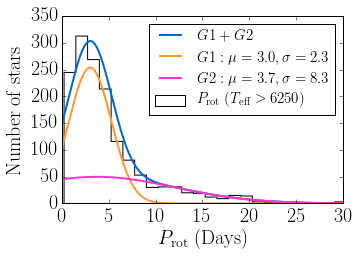

In [77]:
plt.hist(Prot, 50, color="w", histtype="stepfilled", 
         label="$P_{\mathrm{rot}}~(T_{\mathrm{eff}} > 6250)$")  # ,~\mathrm{McQuillan~et~al.~(2013)}$")
ys = Double_Gaussian(result2.x, xs)
ys1 = Gaussian([A1, mu1, sig1], xs)
ys2 = Gaussian([A2, mu2, sig2], xs)
plt.plot(xs, ys, color=cols.blue, lw=2, label="$G1 + G2$")
plt.plot(xs, ys1, color=cols.orange, lw=2, label="$G1:\mu={0:.1f}, \sigma={1:.1f}$".format(mu1, sig1))
plt.plot(xs, ys2, color=cols.pink, lw=2, label="$G2:\mu={0:.1f}, \sigma={1:.1f}$".format(mu2, sig2))
plt.xlim(0, 30)
plt.legend()
plt.xlabel("$P_{\mathrm{rot}}~\mathrm{(Days)}$")
plt.ylabel("$\mathrm{Number~of~stars}$")
plt.subplots_adjust(bottom=.25, left=.25)
plt.savefig("hot_star_hist.pdf")

In [81]:
print(chi2(result1.x, x, y)/(len(x)-3-1), Double_chi2(result2.x, x, y)/(len(x)-6-1))

107.320483706 18.0529947306
